In [1]:
import Metrica_IO as mio
import Metrica_Viz as mviz

In [2]:
DATADIR = 'data'
game_id = 2

# Event data

In [3]:
events = mio.read_event_data(DATADIR,game_id)

In [4]:
events['Type'].value_counts()

PASS              964
CHALLENGE         311
RECOVERY          248
BALL LOST         233
SET PIECE          80
BALL OUT           49
SHOT               24
FAULT RECEIVED     20
CARD                6
Name: Type, dtype: int64

In [5]:
events

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
0,Away,SET PIECE,KICK OFF,1,51,2.04,51,2.04,Player23,NaN,NaN,NaN,NaN,NaN
1,Away,PASS,NaN,1,51,2.04,87,3.48,Player23,Player20,0.50,0.50,0.40,0.51
2,Away,PASS,NaN,1,146,5.84,186,7.44,Player20,Player18,0.43,0.50,0.44,0.22
3,Away,PASS,NaN,1,248,9.92,283,11.32,Player18,Player17,0.47,0.19,0.31,0.28
4,Away,PASS,NaN,1,316,12.64,346,13.84,Player17,Player16,0.29,0.32,0.26,0.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1930,Away,BALL LOST,INTERCEPTION,2,140122,5604.88,140183,5607.32,Player21,NaN,0.54,0.77,0.29,0.24
1931,Home,CHALLENGE,AERIAL-LOST,2,140180,5607.20,140180,5607.20,Player1,NaN,0.31,0.30,NaN,NaN
1932,Away,CHALLENGE,AERIAL-LOST,2,140183,5607.32,140183,5607.32,Player24,NaN,0.32,0.30,NaN,NaN
1933,Home,RECOVERY,NaN,2,140211,5608.44,140211,5608.44,Player12,NaN,0.34,0.32,NaN,NaN


The first thing to focus on is that the coordinates are between 0 and 1. 

It would be easier to change it in meters now. In fact, it will help to analyse speed, shot distance etc with understandable data.

In [6]:
events = mio.to_metric_coordinates(events)

Adding a 'minute' feature

In [7]:
events['Minute'] = events['Start Time [s]']/60

Let's try to separate data by team, type of event etc.

In [8]:
home_events = events[events['Team'] == 'Home']
away_events = events[events['Team'] == 'Away']

In [9]:
print(home_events['Type'].value_counts(),away_events['Type'].value_counts())

PASS              543
CHALLENGE         160
RECOVERY          135
BALL LOST         120
SET PIECE          34
BALL OUT           27
SHOT               13
FAULT RECEIVED      9
CARD                3
Name: Type, dtype: int64 PASS              421
CHALLENGE         151
RECOVERY          113
BALL LOST         113
SET PIECE          46
BALL OUT           22
SHOT               11
FAULT RECEIVED     11
CARD                3
Name: Type, dtype: int64


At the first sight it seems that the game was quite close. All events are quite similar.

### Shots

In [10]:
shots = events[events['Type'] == 'SHOT']
home_shots = home_events[home_events.Type == 'SHOT']
away_shots = away_events[away_events.Type == 'SHOT']

In [11]:
home_shots['Subtype'].value_counts()

HEAD-OFF TARGET-OUT    4
ON TARGET-SAVED        4
OFF TARGET-OUT         2
ON TARGET-GOAL         2
HEAD-ON TARGET-GOAL    1
Name: Subtype, dtype: int64

In [12]:
away_shots['Subtype'].value_counts()

OFF TARGET-OUT         3
ON TARGET-SAVED        2
BLOCKED                2
ON TARGET-GOAL         2
HEAD-OFF TARGET-OUT    1
OFF TARGET-HEAD-OUT    1
Name: Subtype, dtype: int64

It seems that the game end up at 3-3.

In [13]:
home_goals = home_shots[home_shots['Subtype'].str.contains('-GOAL')].copy()
away_goal = away_shots[away_shots['Subtype'].str.contains('-GOAL')].copy()

In [14]:
home_goals

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y,Minute
198,Home,SHOT,ON TARGET-GOAL,1,12202,488.08,12212,488.48,Player10,NaN,-47.70,-3.40,-54.06,-2.04,8.134667
1118,Home,SHOT,HEAD-ON TARGET-GOAL,2,73983,2959.32,73995,2959.80,Player9,NaN,47.70,-1.36,54.06,-2.04,49.322000
1723,Home,SHOT,ON TARGET-GOAL,2,121027,4841.08,121055,4842.20,Player12,NaN,30.74,-5.44,54.06,-2.72,80.684667


### Vizualisation

Text(-47.7, -3.400000000000003, '')

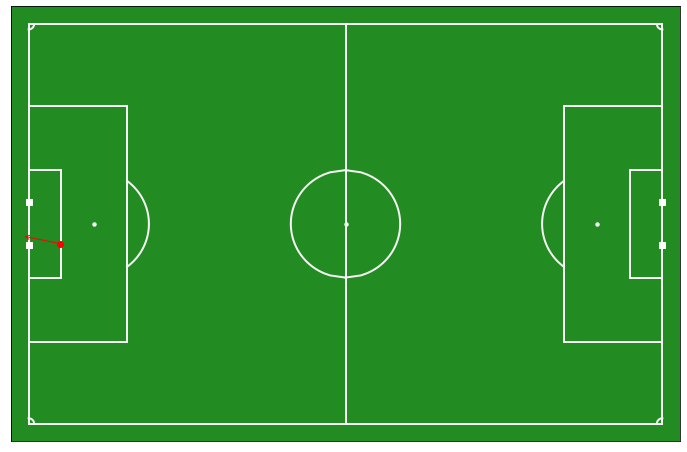

In [15]:
fig, ax = mviz.plot_pitch()
ax.plot(events.loc[198]['Start X'],events.loc[198]['Start Y'], 'ro')
ax.annotate("", xy = events.loc[198][['End X', 'End Y']], xytext = events.loc[198][['Start X', 'Start Y']], alpha=0.6, arrowprops=dict(arrowstyle="->",color='r'))

Another interesting thing is to look as previous events that led to the goal. We can do that thank to the *plot_events* function.

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1729a4ab3c8>)

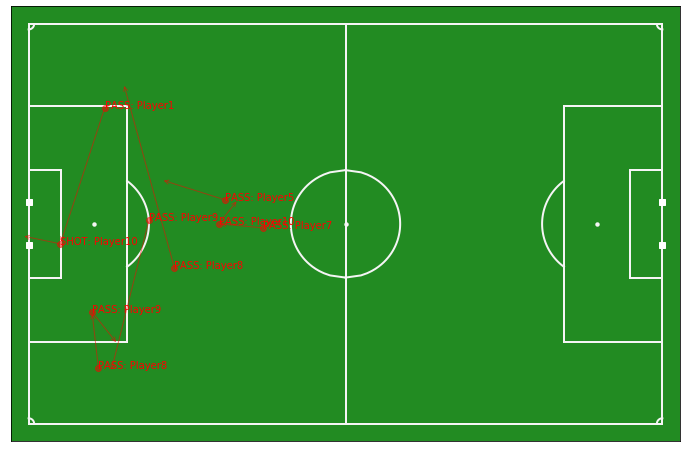

In [16]:
mviz.plot_events( events.loc[190:198], indicators = ['Marker', 'Arrow'], annotate = True)

# Tracking data

In [17]:
tracking_home = mio.tracking_data(DATADIR, game_id, 'Home')
tracking_away = mio.tracking_data(DATADIR, game_id, 'Away')

Reading team: home
Reading team: away


In [52]:
tracking_home.head(3)

,Period,Time [s],Home_11_x,Home_11_y,Home_1_x,Home_1_y,Home_2_x,Home_2_y,Home_3_x,Home_3_y,...,Home_10_x,Home_10_y,Home_12_x,Home_12_y,Home_13_x,Home_13_y,Home_14_x,Home_14_y,ball_x,ball_y
Frame,,,,,,,,,,,,,,,,,,,,,
1,1,0.04,46.9315,-0.28084,15.70072,14.5486,18.81712,4.89396,21.07492,-3.81208,...,0.20564,-7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0.08,46.9315,-0.28084,15.70072,14.5486,18.81712,4.89396,21.07492,-3.81208,...,0.20564,-7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0.12,46.9315,-0.28084,15.70072,14.5486,18.81712,4.89396,21.07492,-3.81208,...,0.20564,-7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
tracking_home.columns

Index(['Period', 'Time [s]', 'Home_11_x', 'Home_11_y', 'Home_1_x', 'Home_1_y',
       'Home_2_x', 'Home_2_y', 'Home_3_x', 'Home_3_y', 'Home_4_x', 'Home_4_y',
       'Home_5_x', 'Home_5_y', 'Home_6_x', 'Home_6_y', 'Home_7_x', 'Home_7_y',
       'Home_8_x', 'Home_8_y', 'Home_9_x', 'Home_9_y', 'Home_10_x',
       'Home_10_y', 'Home_12_x', 'Home_12_y', 'Home_13_x', 'Home_13_y',
       'Home_14_x', 'Home_14_y', 'ball_x', 'ball_y'],
      dtype='object')

In [20]:
tracking_home = mio.to_metric_coordinates(tracking_home)
tracking_away = mio.to_metric_coordinates(tracking_away)

### Plotting 

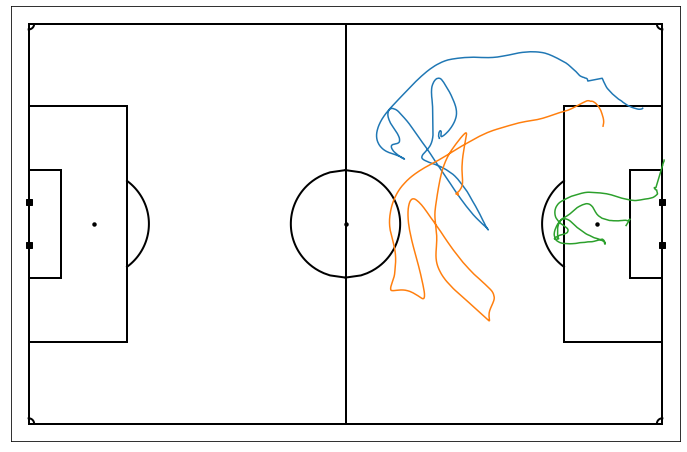

In [21]:
fig, ax = mviz.plot_pitch(field_color = 'white')
ax.plot(tracking_home['Home_1_x'].iloc[:1500],tracking_home['Home_1_y'].iloc[:1500])
ax.plot(tracking_home['Home_2_x'].iloc[:1500],tracking_home['Home_2_y'].iloc[:1500])
ax.plot(tracking_home['Home_11_x'].iloc[:1500],tracking_home['Home_11_y'].iloc[:1500])# Goal keeper

Frame is the key between tracking and events. It is the index of the tracking data.

### Positions

#### Kick-off

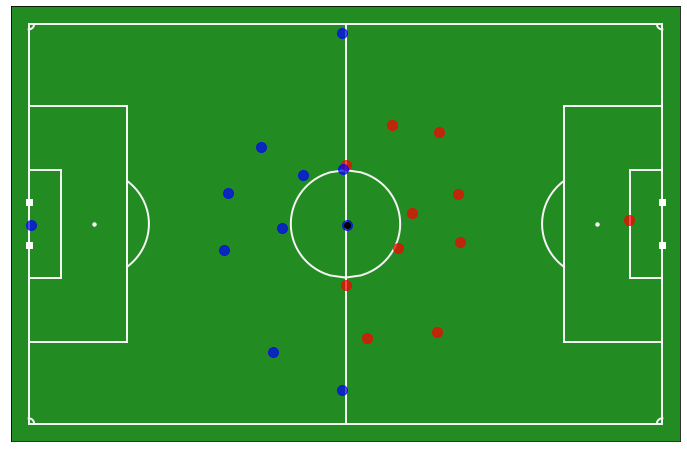

In [22]:
fig , ax = mviz.plot_frame( tracking_home.loc[51], tracking_away.loc[51])

#### Goals

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1729a67eb88>)

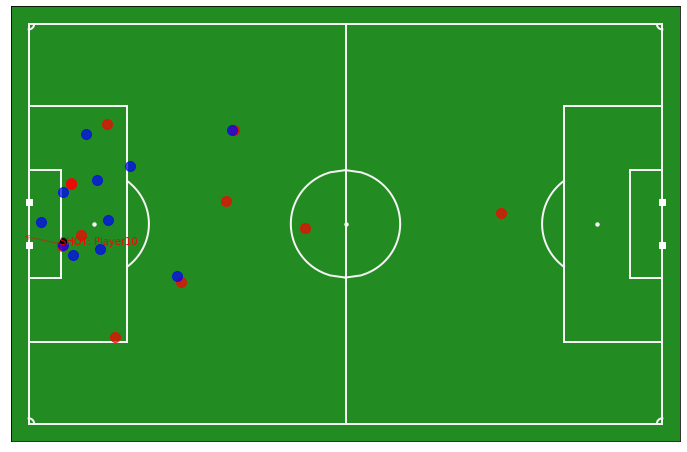

In [23]:
fig , ax = mviz.plot_events( events.loc[198:198], indicators = ['Marker', 'Arrow'], annotate = True)
frame = events.loc[198]['Start Frame']
mviz.plot_frame( tracking_home.loc[frame], tracking_away.loc[frame], figax = (fig,ax))

# Homework

**1.  Plot the passes and shot leading up to the second and third goals in the match**

In [24]:
shots[shots['Subtype'].str.contains('-GOAL')].copy()

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y,Minute
198,Home,SHOT,ON TARGET-GOAL,1,12202,488.08,12212,488.48,Player10,NaN,-47.70,-3.40,-54.06,-2.04,8.134667
823,Away,SHOT,ON TARGET-GOAL,1,53049,2121.96,53075,2123.00,Player24,NaN,44.52,2.72,54.06,1.36,35.366000
1118,Home,SHOT,HEAD-ON TARGET-GOAL,2,73983,2959.32,73995,2959.80,Player9,NaN,47.70,-1.36,54.06,-2.04,49.322000
1671,Away,SHOT,ON TARGET-GOAL,2,115009,4600.36,115024,4600.96,Player20,NaN,-40.28,-1.36,-55.12,-2.72,76.672667
1723,Home,SHOT,ON TARGET-GOAL,2,121027,4841.08,121055,4842.20,Player12,NaN,30.74,-5.44,54.06,-2.72,80.684667


The second goal is at the index 823 and the third at 1118.

Lets look at the previous events for the second goal

In [25]:
events.loc[815:823]

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y,Minute
815,Home,BALL LOST,HEAD,1,52692,2107.68,52757,2110.28,Player10,NaN,0.00,6.80,-3.18,23.12,35.128000
816,Away,CHALLENGE,AERIAL-WON,1,52694,2107.76,52694,2107.76,Player17,NaN,-1.06,6.80,NaN,NaN,35.129333
817,Away,RECOVERY,INTERCEPTION,1,52694,2107.76,52694,2107.76,Player17,NaN,-1.06,6.80,NaN,NaN,35.129333
818,Away,PASS,HEAD,1,52696,2107.84,52746,2109.84,Player17,Player18,-1.06,7.48,-5.30,18.36,35.130667
819,Away,PASS,NaN,1,52784,2111.36,52807,2112.28,Player18,Player21,-3.18,22.44,1.06,12.24,35.189333
820,Away,PASS,NaN,1,52871,2114.84,52936,2117.44,Player21,Player19,2.12,12.92,30.74,-26.52,35.247333
821,Away,PASS,NaN,1,52941,2117.64,52971,2118.84,Player19,Player23,30.74,-27.20,37.10,-15.64,35.294000
822,Away,PASS,NaN,1,53027,2121.08,53045,2121.80,Player23,Player24,41.34,-9.52,44.52,2.72,35.351333
823,Away,SHOT,ON TARGET-GOAL,1,53049,2121.96,53075,2123.00,Player24,NaN,44.52,2.72,54.06,1.36,35.366000


Lets plot all the events from the recovery

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1729ac3f508>)

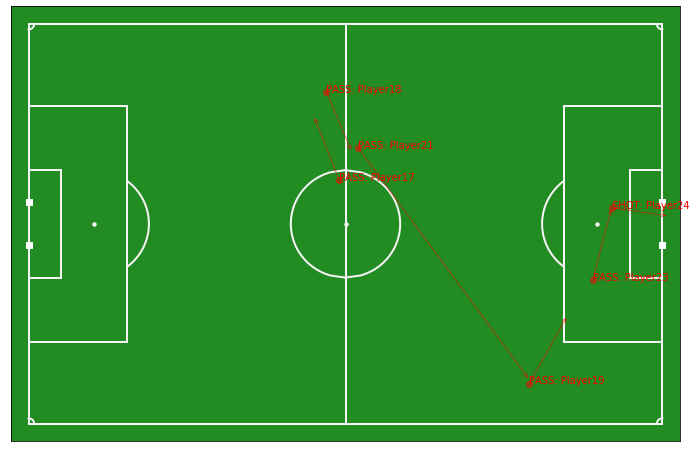

In [26]:
mviz.plot_events( events.loc[818:823], indicators = ['Marker', 'Arrow'], annotate = True)

We do the same for the third goal

In [27]:
events.loc[1110:1118]

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y,Minute
1110,Home,PASS,NaN,2,73692,2947.68,73731,2949.24,Player5,Player8,4.24,6.12,11.66,25.84,49.128000
1111,Home,PASS,NaN,2,73813,2952.52,73844,2953.76,Player8,Player9,27.56,21.08,36.04,4.08,49.208667
1112,Home,CHALLENGE,TACKLE-LOST,2,73854,2954.16,73854,2954.16,Player9,NaN,37.10,4.08,NaN,NaN,49.236000
1113,Home,BALL LOST,THEFT,2,73854,2954.16,73854,2954.16,Player9,NaN,37.10,4.08,NaN,NaN,49.236000
1114,Home,RECOVERY,INTERCEPTION,2,73877,2955.08,73877,2955.08,Player10,NaN,39.22,8.16,NaN,NaN,49.251333
1115,Home,PASS,NaN,2,73902,2956.08,73923,2956.92,Player10,Player8,39.22,8.16,43.46,19.04,49.268000
1116,Home,PASS,CROSS,2,73955,2958.20,73983,2959.32,Player8,Player9,46.64,19.72,47.70,-1.36,49.303333
1117,Home,CHALLENGE,AERIAL-WON,2,73983,2959.32,73983,2959.32,Player9,NaN,47.70,-1.36,NaN,NaN,49.322000
1118,Home,SHOT,HEAD-ON TARGET-GOAL,2,73983,2959.32,73995,2959.80,Player9,NaN,47.70,-1.36,54.06,-2.04,49.322000


(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1729aca8348>)

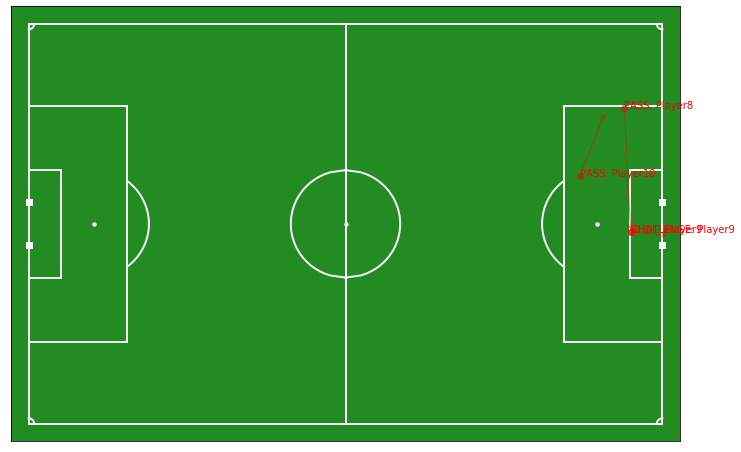

In [28]:
mviz.plot_events( events.loc[1115:1118], indicators = ['Marker', 'Arrow'], annotate = True)

- Plot all the shots by Player 9 of the Home Team. Use different symbol and transparency for shots that resulted in goals.

In [29]:
player9_shots = shots[shots.From == 'Player9']

In [30]:
player9_shots

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y,Minute
1118,Home,SHOT,HEAD-ON TARGET-GOAL,2,73983,2959.32,73995,2959.8,Player9,NaN,47.70,-1.36,54.06,-2.04,49.322000
1681,Home,SHOT,HEAD-OFF TARGET-OUT,2,117218,4688.72,117245,4689.8,Player9,NaN,41.34,-7.48,54.06,5.44,78.145333
1756,Home,SHOT,HEAD-OFF TARGET-OUT,2,124336,4973.44,124365,4974.6,Player9,NaN,45.58,-0.00,55.12,-7.48,82.890667
1927,Home,SHOT,ON TARGET-SAVED,2,139891,5595.64,139925,5597.0,Player9,NaN,21.20,-1.36,50.88,-1.36,93.260667


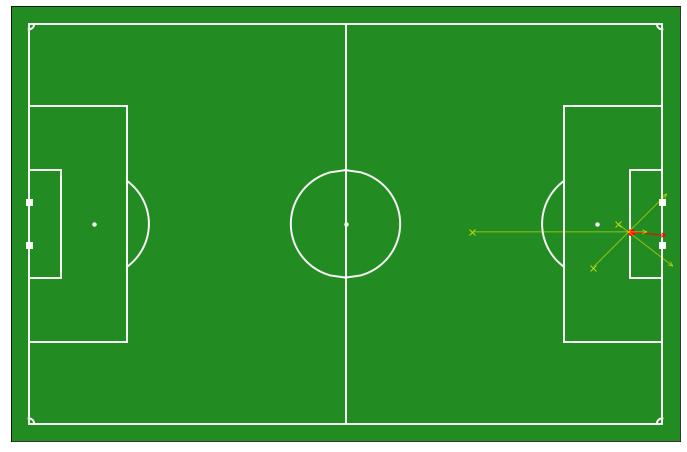

In [33]:
fig, ax = mviz.plot_pitch()
for i, shot in player9_shots.iterrows():
    x, y = shot['Start X'], shot['Start Y']
    dx, dy = shot['End X'], shot['End Y']
    if 'GOAL' in shot['Subtype']:
        ax.plot(x,y,'ro',alpha = 1)
        ax.annotate("",xy = [dx,dy],xytext = [x,y], arrowprops=dict(arrowstyle="->",color='r'))
    else:
        ax.plot(x,y,'yx',color='yellow', alpha = 0.7)
        ax.annotate("",xy = [dx,dy],xytext = [x,y],arrowprops=dict(arrowstyle="->",color='yellow', alpha=0.5))

- Plot the positions of all players at Players 9's goal

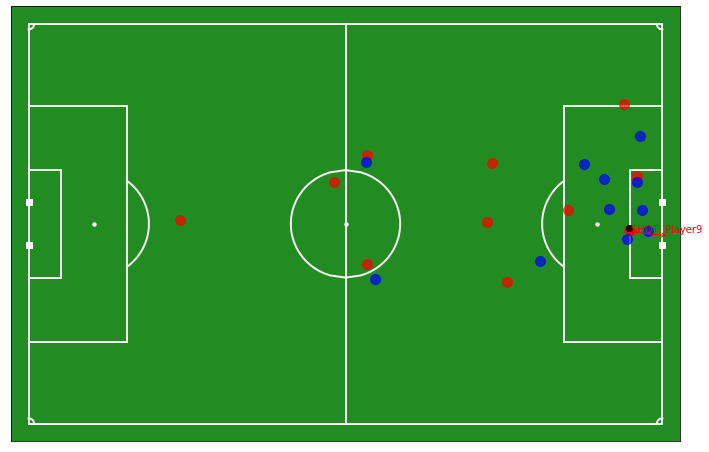

In [41]:
fig, ax = mviz.plot_events(events.loc[1118:1118],indicators = ['Marker', 'Arrow'], annotate = True, alpha=1)
frame = events.loc[1118]['Start Frame']
fig, ax = mviz.plot_frame(tracking_home.loc[frame],tracking_away.loc[frame], figax=(fig,ax))

- Calculate how far each player ran

In [95]:
home_distance = {'1':0,'2':0,'3':0,'4':0,'5':0,'6':0,'7':0,'8':0,'9':0,'10':0,'11':0, '12':0, '13':0,'14':0}

In [94]:
from scipy.spatial import distance
import math
def distance_euc(start_x, start_y, end_x, end_y):
    if math.isnan(start_x) is True:
        return 0
    if math.isnan(end_x) is True:
        return 0
    else:
        return distance.euclidean((start_x,start_y),(end_x,end_y))

In [63]:
tracking_home.head(3)

,Period,Time [s],Home_11_x,Home_11_y,Home_1_x,Home_1_y,Home_2_x,Home_2_y,Home_3_x,Home_3_y,...,Home_10_x,Home_10_y,Home_12_x,Home_12_y,Home_13_x,Home_13_y,Home_14_x,Home_14_y,ball_x,ball_y
Frame,,,,,,,,,,,,,,,,,,,,,
1,1,0.04,46.9315,-0.28084,15.70072,14.5486,18.81712,4.89396,21.07492,-3.81208,...,0.20564,-7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0.08,46.9315,-0.28084,15.70072,14.5486,18.81712,4.89396,21.07492,-3.81208,...,0.20564,-7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0.12,46.9315,-0.28084,15.70072,14.5486,18.81712,4.89396,21.07492,-3.81208,...,0.20564,-7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
row_iterator = tracking_home.iterrows()
_, last = row_iterator.__next__()
for i, row in row_iterator: #max is 141156 
    for key,value in home_distance.items():
        start_x = row['Home_'+key+'_x']
        start_y = row['Home_'+key+'_y']
        end_x = last['Home_'+key+'_x']
        end_y = last['Home_'+key+'_y']
        home_distance[key]= home_distance[key]+distance_euc(start_x,start_y,end_x,end_y)
    last = row

In [121]:
df = pd.DataFrame.from_dict(home_distance, orient = 'index')
df.columns = ['Distance(m)']
df['Distance(km)'] = df['Distance(m)']/1000

In [125]:
df

,Distance(m),Distance(km)
1,10435.910546,10.435911
2,9991.684623,9.991685
3,9631.355462,9.631355
4,7321.092038,7.321092
5,12242.253654,12.242254
6,11608.051710,11.608052
7,11298.449736,11.298450
8,9113.617593,9.113618
9,9856.172043,9.856172
10,9098.232198,9.098232
